In [21]:
import pandas as pd
from tqdm.notebook import tqdm

# Популярные запросы

In [44]:
popular = pd.read_csv('query_popularity_tab.csv', sep = '\t')
popular

,query,query_popularity
0,ноутбук,10
1,куртка женская осенняя,10
2,ботинки женские,10
3,видеокарта,10
4,пальто женское осеннее,10
...,...,...
336983,конструктор робо-динозавры,1
336984,чика,1
336985,Дешевый товар,1
336986,макса,1


## Выделим запросы, состоящие больше чем из 1 слова

In [45]:
popular['query'] = popular['query'].astype(str)
popular['splited'] = popular['query'].apply(lambda x: len(x.split(' ')))

In [54]:
popular_to_bert = popular[ (popular['splited'] > 1) & (popular['splited'] < 6) ]
popular_to_bert

,query,query_popularity,splited
1,куртка женская осенняя,10,3
2,ботинки женские,10,2
4,пальто женское осеннее,10,3
5,пальто женское,10,2
6,джинсы женские,10,2
...,...,...,...
336979,уход за кожей,1,3
336982,Темный чехол xr,1,3
336983,конструктор робо-динозавры,1,2
336985,Дешевый товар,1,2


In [55]:
popular_to_bert.to_csv('popular_to_bert.csv', index = False)

In [56]:
val_bert = pd.read_csv('popular_to_bert.csv')
val_bert

,query,query_popularity,splited
0,куртка женская осенняя,10,3
1,ботинки женские,10,2
2,пальто женское осеннее,10,3
3,пальто женское,10,2
4,джинсы женские,10,2
...,...,...,...
290140,уход за кожей,1,3
290141,Темный чехол xr,1,3
290142,конструктор робо-динозавры,1,2
290143,Дешевый товар,1,2


In [57]:
val_bert['splited'].value_counts()

3    101136
2     86650
4     69127
5     33232
Name: splited, dtype: int64

# Поисковые запросы

In [5]:
search_history  = pd.read_csv('search_history.csv', nrows = 1e4)
search_history.head(30)

,wbuser_id,UQ,cnt,locale,weekday,time
0,37bc0ce12ffabce1b1882e66d461ed0e,тапочки женские домашние,1933,Ru,0,10:48:53
1,4636a6706e6736d818816d8657565aa2,чехол для бейджика,1513,Ru,0,10:48:53
2,708f4040baf99acfc9496563edff1b1a,GUESS,4,Ru,0,10:48:53
3,70311ec9008a31f743c164e6f1198c86,штора для ванной,0,Ru,0,10:48:53
4,70311ec9008a31f743c164e6f1198c86,фототфон,92272,Ru,0,10:48:53
5,3d5e0b035ee04de0801692081278ef1a,7024,93,Ru,0,10:48:53
6,70311ec9008a31f743c164e6f1198c86,туфли мужские осенние,77232,Ru,0,10:48:53
7,70311ec9008a31f743c164e6f1198c86,леггинсы женские,17898,Ru,0,10:48:53
8,4d269edf958e9b338258d5303a92c124,чехол на айфон 11,64677,Ru,0,10:48:53
9,e2382a1810411d2860da0c2e75c5b695,ботинки женские мембрана,507,Ru,0,10:48:53


### Установка библиотеки автоисправления ошибок

In [58]:
# !pip install pyaspeller

In [64]:
from pyaspeller import YandexSpeller
speller = YandexSpeller()
fixed = speller.spelled('чехол для телфон')

fixed

'чехол для телефона'

In [ ]:
speller_list = []

In [13]:
for index in tqdm(range(search_history.shape[0])):
    try:
        search_history['UQ'][index] = speller.spelled(search_history['UQ'][index])
    except:
        search_history['UQ'][index] = "Удалить эту строку"
        print('что-то произошло')

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-13-f7051cb071a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_history['UQ'][index] = speller.spelled(search_history['UQ'][index])
<ipython-input-13-f7051cb071a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search_history['UQ'][index] = "Удалить эту строку"


что-то произошло
что-то произошло


In [14]:
search_history.head(30)

,wbuser_id,UQ,cnt,locale,weekday,time
0,37bc0ce12ffabce1b1882e66d461ed0e,тапочки женские домашние,1933,Ru,0,10:48:53
1,4636a6706e6736d818816d8657565aa2,чехол для бейджика,1513,Ru,0,10:48:53
2,708f4040baf99acfc9496563edff1b1a,GUESS,4,Ru,0,10:48:53
3,70311ec9008a31f743c164e6f1198c86,штора для ванной,0,Ru,0,10:48:53
4,70311ec9008a31f743c164e6f1198c86,фотофон,92272,Ru,0,10:48:53
5,3d5e0b035ee04de0801692081278ef1a,7024,93,Ru,0,10:48:53
6,70311ec9008a31f743c164e6f1198c86,туфли мужские осенние,77232,Ru,0,10:48:53
7,70311ec9008a31f743c164e6f1198c86,легинсы женские,17898,Ru,0,10:48:53
8,4d269edf958e9b338258d5303a92c124,чехол на айфон 11,64677,Ru,0,10:48:53
9,e2382a1810411d2860da0c2e75c5b695,ботинки женские мембрана,507,Ru,0,10:48:53


In [75]:
for index, row in tqdm(search_history.iterrows()):
    search_history['UQ'][index] = speller.spelled(search_history['UQ'][index])

,wbuser_id,UQ,cnt,locale,weekday,time
0,37bc0ce12ffabce1b1882e66d461ed0e,тапочки женские домашние,1933,Ru,0,10:48:53
1,4636a6706e6736d818816d8657565aa2,чехол для бейджика,1513,Ru,0,10:48:53
2,708f4040baf99acfc9496563edff1b1a,GUESS,4,Ru,0,10:48:53
3,70311ec9008a31f743c164e6f1198c86,штора для ванной,0,Ru,0,10:48:53
4,70311ec9008a31f743c164e6f1198c86,фототфон,92272,Ru,0,10:48:53
...,...,...,...,...,...,...
9995,70311ec9008a31f743c164e6f1198c86,игрушки котята,1237,Ru,0,06:02:13
9996,70311ec9008a31f743c164e6f1198c86,леггинсы женские,17906,Ru,0,06:02:13
9997,a00aa11a19e308567d5ecb1cc9728fb6,Наружный угол для плиьки,0,Ru,0,06:02:13
9998,70311ec9008a31f743c164e6f1198c86,румяна,2155,Kz,0,06:02:13


In [15]:
!pip freeze

-cikit-learn @ file:///C:/ci/scikit-learn_1614446896245/work
-umpy @ file:///C:/ci/numpy_and_numpy_base_1618497418457/work
absl-py==0.13.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_

zipp @ file:///tmp/build/80754af9/zipp_1615904174917/work
zope.event==4.5.0
zope.interface @ file:///C:/ci/zope.interface_1616357322857/work


In [71]:
search_history['UQ'][0]

'тапочки женские домашние'

# 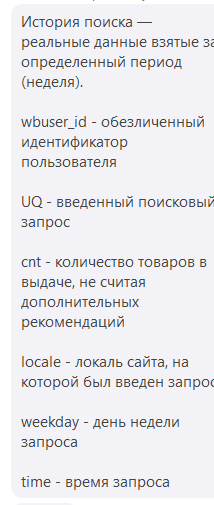